In [1]:
from ucimlrepo import fetch_ucirepo 
  

# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 


/Users/himanshugoel/Downloads/work/project1/myenv/lib/python3.13/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
df = pd.read_csv("diabetic_data.csv")

categorical_cols = [
    'race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
    'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
    'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
    'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
    'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed'
]

for col in categorical_cols:
    df[col] = df[col].astype('category')


In [24]:
#print(df.info())
# Get all object columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", categorical_cols)
# Drop your target first so you don’t one-hot encode it!
X = df.drop("readmitted", axis=1)  # replace 'readmitted' with your label col
y = df["readmitted"]

# One-hot encode
X_encoded = pd.get_dummies(X, columns=categorical_cols)

print(X_encoded.info())  # check that all columns are numeric now


Categorical columns: ['diag_1', 'diag_2', 'diag_3', 'readmitted']


KeyError: "['readmitted'] not in index"

In [18]:

X = df.drop('readmitted', axis=1)
y = (df['readmitted'] == '<30').astype(int)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()

model.fit(X_train, y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:race: category, gender: category, age: category, weight: category, payer_code: category, medical_specialty: category, diag_1: object, diag_2: object, diag_3: object, max_glu_serum: category, A1Cresult: category, metformin: category, repaglinide: category, nateglinide: category, chlorpropamide: category, glimepiride: category, acetohexamide: category, glipizide: category, glyburide: category, tolbutamide: category, pioglitazone: category, rosiglitazone: category, acarbose: category, miglitol: category, troglitazone: category, tolazamide: category, examide: category, citoglipton: category, insulin: category, glyburide-metformin: category, glipizide-metformin: category, glimepiride-pioglitazone: category, metformin-rosiglitazone: category, metformin-pioglitazone: category, change: category, diabetesMed: category

In [10]:
y_train


57636    0
61387    1
38777    0
13348    0
30107    0
        ..
34169    0
22932    0
68176    0
52034    0
84354    0
Name: readmitted, Length: 81412, dtype: int64

In [27]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1️⃣ Load your uploaded CSV
df = pd.read_csv("diabetic_data.csv")

print("Initial shape:", df.shape)
print("Columns with object dtype:\n", df.select_dtypes(include="object").columns.tolist())

# 2️⃣ Drop obvious non-predictive columns (if any)
# Example: remove patient IDs or encounter IDs if they exist
cols_to_drop = ['encounter_id', 'patient_nbr']
df = df.drop(columns=cols_to_drop, errors='ignore')

# 3️⃣ Choose a target column — here using 'readmitted'
# Replace this with your actual target column
target_col = "readmitted"
X = df.drop(columns=[target_col])
y = df[target_col]



Initial shape: (101766, 50)
Columns with object dtype:
 ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [28]:

# 4️⃣ Handle your categorical features — safest: one-hot encoding
categorical_cols = X.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", categorical_cols)

X_encoded = pd.get_dummies(X, columns=categorical_cols)

print("Encoded shape:", X_encoded.shape)

# 5️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)



Categorical columns: ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']
Encoded shape: (101766, 2468)


In [29]:
# 6️⃣ Train XGBoost
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    n_jobs=-1
)

model.fit(X_train, y_train)

# 7️⃣ Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"XGBoost Accuracy: {acc:.4f}")


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['<30' '>30' 'NO']

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

model.fit(X_train, y_train_enc)

ValueError: feature_names must be string, and may not contain [, ] or <

In [31]:
# 1️⃣ One-hot encode
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# 2️⃣ Clean column names to remove [ ] < > and spaces
X_encoded.columns = (
    X_encoded.columns
    .str.replace('[', '_', regex=False)
    .str.replace(']', '_', regex=False)
    .str.replace('<', 'lt_', regex=False)
    .str.replace('>', 'gt_', regex=False)
    .str.replace(' ', '_', regex=False)
)

print("Cleaned columns:", X_encoded.columns.tolist()[:10])


Cleaned columns: ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1️⃣ Load CSV
df = pd.read_csv("diabetic_data.csv")
print("Shape:", df.shape)

# 2️⃣ Drop ID columns (if any)
df = df.drop(columns=['encounter_id', 'patient_nbr'], errors='ignore')

# 3️⃣ Features + Target
target_col = "readmitted"  # adjust if your target is different
X = df.drop(columns=[target_col])
y = df[target_col]

# 🔑 4️⃣ Label encode target & clean symbols
# Example: remove any leading/trailing whitespace and unwanted chars
y_clean = y.astype(str).str.strip().str.replace('[<>]', '', regex=True)
print("Unique target labels BEFORE clean:", y.unique())
print("Unique target labels AFTER clean:", y_clean.unique())

# Label encode
le = LabelEncoder()
y_encoded = le.fit_transform(y_clean)
print("Classes:", le.classes_)
print("Encoded labels:", set(y_encoded))

# 5️⃣ One-hot encode features
categorical_cols = X.select_dtypes(include="object").columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# ✅ Clean column names to remove special chars: [ ] < > space
X_encoded.columns = (
    X_encoded.columns
    .str.replace('[', '_', regex=False)
    .str.replace(']', '_', regex=False)
    .str.replace('<', 'lt_', regex=False)
    .str.replace('>', 'gt_', regex=False)
    .str.replace(' ', '_', regex=False)
)

print("Example feature names:", X_encoded.columns.tolist()[:10])

# 6️⃣ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42
)

# 7️⃣ Train XGBoost
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    n_jobs=-1
)

model.fit(X_train, y_train)

# 8️⃣ Predict + score
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ XGBoost Accuracy: {acc:.4f}")


Shape: (101766, 50)
Unique target labels BEFORE clean: ['NO' '>30' '<30']
Unique target labels AFTER clean: ['NO' '30']
Classes: ['30' 'NO']
Encoded labels: {np.int64(0), np.int64(1)}
Example feature names: ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient']


/Users/himanshugoel/Downloads/work/project1/myenv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [15:18:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost Accuracy: 0.6470


In [34]:
# 8️⃣ Predict + score
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"\n✅ XGBoost Training Accuracy: {train_acc:.4f}")
print(f"✅ XGBoost Test Accuracy:     {test_acc:.4f}")



✅ XGBoost Training Accuracy: 0.6984
✅ XGBoost Test Accuracy:     0.6470


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


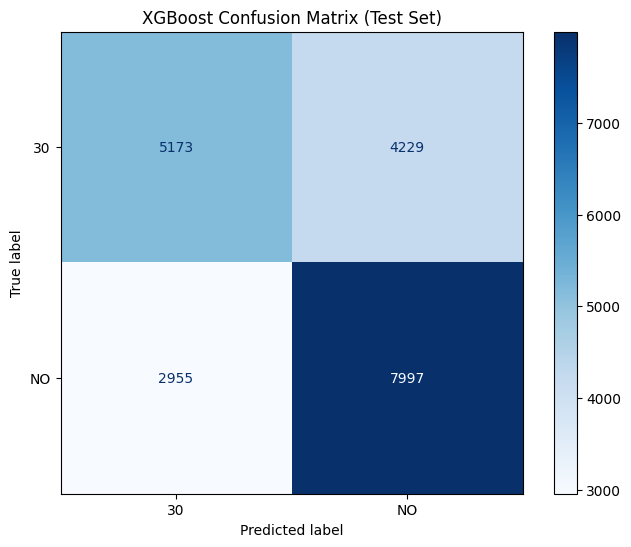

In [37]:
# 9️⃣ Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
plt.title("XGBoost Confusion Matrix (Test Set)")
plt.show()
